**Indian Sign Language**
Indian Sign Language containing the English alphabets from A-Z & numbers 0-9.
- This dataset contains sign language (indian version)
- Same like spoken language sign language are also different area to area. For eg Amercian sign language , Indian sign language
About Dataset
-The dataset includes 1000 images per class which makes the dataset of 36000 images and the following image pre-processing techniques were applied on the dataset. The dimensions of the images are 250*250 with varying backgrounds.


In [7]:
!pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPool2D,BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


In [9]:
# Dataset = kaggle datasets download -d atharvadumbre/indian-sign-language-islrtc-referred

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [11]:
!kaggle datasets download -d atharvadumbre/indian-sign-language-islrtc-referred

 99% 603M/609M [00:06<00:00, 127MB/s]
100% 609M/609M [00:06<00:00, 93.5MB/s]


In [12]:
# This code is used to extract the zip file
zip_file_path='/content/indian-sign-language-islrtc-referred.zip'
with ZipFile(zip_file_path,'r') as zip:
  zip.extractall()
  zip.close()

**Split Folders** :
This module is used to split the images data of sign language into Training and validiation dataset and the ratio i have taken is 80 % in train and 20% in validiation

In [13]:
import splitfolders
data_dir = '/content/original_images'

output_dir = '/content/all_images'

splitfolders.ratio(data_dir, output=output_dir, seed=42, ratio=(0.8, 0.2))


Copying files: 36000 files [00:11, 3260.46 files/s]


In [14]:
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/all_images/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

Found 28800 files belonging to 36 classes.


In [15]:
val_data = keras.utils.image_dataset_from_directory(
    directory = '/content/all_images/val',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

Found 7200 files belonging to 36 classes.


In [16]:
def process_image(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label


In [17]:
train_data=train_data.map(process_image)
val_data=val_data.map(process_image)


 **CNN Architecture**
 1. The provided code creates a sequential model for image classification using the Keras framework in Python. It starts with a convolutional layer that applies 64 filters with a size of 3x3 to the input images, followed by a ReLU activation function. The max pooling layer with a pool size of 2x2 reduces the spatial dimensions of the feature maps.

 2. The process is repeated with a second convolutional layer with 256 filters, followed by another max pooling layer. Then, a third convolutional layer with 512 filters and a max pooling layer are added. These layers help extract higher-level features from the input images.

 3. Next, a flattening layer is used to convert the 2D feature maps into a 1D vector, which is then passed through a dense layer with 256 units. Finally, the output layer consists of 36 units with a softmax activation function, representing the 36 possible classes for classification.

 4. The model.summary() function provides a summary of the model architecture, including the number of parameters and the shape of each layer's output.

In [18]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Conv2D(512,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Dense(36,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 256)     147712    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 512)       1180160   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 512)      0

In [19]:
# to save the best weights for future use.
checkpoint = ModelCheckpoint(filepath = 'model.h5', monitor = 'val_loss', save_best_only = True, save_weights_only = True)

In [20]:
loss=SparseCategoricalCrossentropy()
optimizers=Adam()


model.compile(loss=loss,optimizer=optimizers,metrics=["acc"])

In [21]:
history = model.fit(train_data,epochs=6,batch_size=32,validation_data=val_data,callbacks=checkpoint)

Epoch 1/6
900/900 [==============================] - 196s 200ms/step - loss: 1.4659 - acc: 0.6456 - val_loss: 0.3221 - val_acc: 0.9158
Epoch 2/6
900/900 [==============================] - 192s 213ms/step - loss: 0.2058 - acc: 0.9459 - val_loss: 0.1931 - val_acc: 0.9517
Epoch 3/6
900/900 [==============================] - 191s 211ms/step - loss: 0.0952 - acc: 0.9725 - val_loss: 0.1294 - val_acc: 0.9694
Epoch 4/6
900/900 [==============================] - 186s 206ms/step - loss: 0.0761 - acc: 0.9800 - val_loss: 0.0941 - val_acc: 0.9764
Epoch 5/6
900/900 [==============================] - 187s 208ms/step - loss: 0.0447 - acc: 0.9865 - val_loss: 0.1086 - val_acc: 0.9740
Epoch 6/6
900/900 [==============================] - 180s 200ms/step - loss: 0.0457 - acc: 0.9872 - val_loss: 0.1079 - val_acc: 0.9737


In [21]:
model.load_weights("model.h5")

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

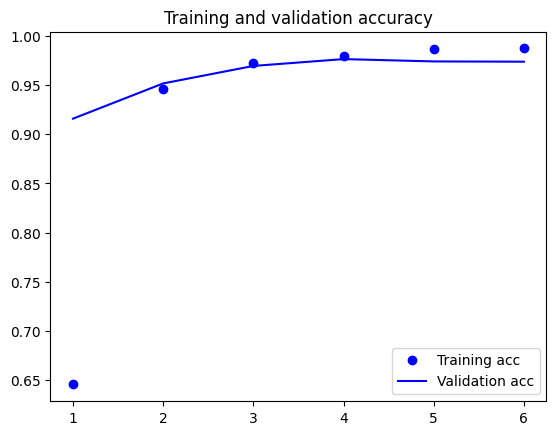

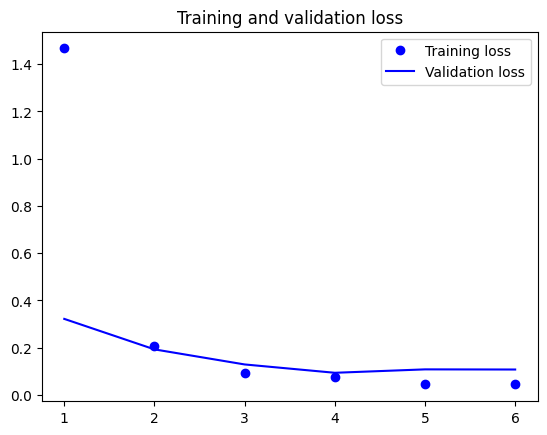

In [23]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()